In [28]:
import pandas as pf
import numpy as nq
%matplotlib inline
import matplotlib.pyplot as ptl
from sklearn.utils import shuffle

In [29]:
train=pf.read_csv('train.csv',index_col='ID')
test=pf.read_csv('test.csv',index_col='ID')

In [30]:
train_shape=train.shape[0]
test_shape=test.shape[0]

In [31]:
train=shuffle(train)

In [32]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
FDJ09OUT018,15.000,Low Fat,0.058633,Snack Foods,46.4744,2009,Medium,Tier 3,Supermarket Type2,543.2928
FDP40OUT013,4.555,Regular,0.034329,Frozen Foods,110.1544,1987,High,Tier 3,Supermarket Type1,1230.3984
DRH15OUT046,8.775,Low Fat,0.109911,Dairy,41.9428,1997,Small,Tier 1,Supermarket Type1,1537.9980
FDM52OUT017,15.100,Low Fat,0.026140,Frozen Foods,149.0076,2007,NaN,Tier 2,Supermarket Type1,4138.6128
FDR02OUT049,16.700,Low Fat,0.022100,Dairy,110.1886,1999,Medium,Tier 1,Supermarket Type1,1334.2632


In [34]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
FDW14OUT017,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
NCN55OUT010,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
FDQ58OUT017,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
FDY38OUT027,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [35]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [36]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [37]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [38]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [39]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [40]:
cleanup_nums={'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF': 2,'reg':3,'low fat':4},'Item_Type':{'Fruits and Vegetables':1,'Snack Foods':2
,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,
'Others':0,'Starchy Foods':13 ,'Breakfast':14 ,'Seafood':15 },'Outlet_Size':{'Medium':1,'Small':0,'High':2},'Outlet_Location_Type':{'Tier 3':2
,'Tier 2':1,'Tier 1':0},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2}}

In [41]:
train.replace(cleanup_nums, inplace=True)

In [42]:
test.replace(cleanup_nums, inplace=True)

In [43]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
FDJ09OUT018,15.000,0,0.058633,2,46.4744,2009,1.0,2,2,543.2928
FDP40OUT013,4.555,1,0.034329,4,110.1544,1987,2.0,2,1,1230.3984
DRH15OUT046,8.775,0,0.109911,5,41.9428,1997,0.0,0,1,1537.9980
FDM52OUT017,15.100,0,0.026140,4,149.0076,2007,NaN,1,1,4138.6128
FDR02OUT049,16.700,0,0.022100,5,110.1886,1999,1.0,0,1,1334.2632


In [44]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,0,0.007565,2,107.8622,1999,1.0,0,1
FDW14OUT017,8.300,3,0.038428,5,87.3198,2007,NaN,1,1
NCN55OUT010,14.600,0,0.099575,0,241.7538,1998,NaN,2,0
FDQ58OUT017,7.315,0,0.015388,2,155.0340,2007,NaN,1,1
FDY38OUT027,NaN,1,0.118599,5,234.2300,1985,1.0,2,3


{'boxes': [<matplotlib.lines.Line2D at 0x58edb1b3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x58edb1bdd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x58edb23a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x58edb23668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x58edb1b518>,
  <matplotlib.lines.Line2D at 0x58edb1b9b0>]}

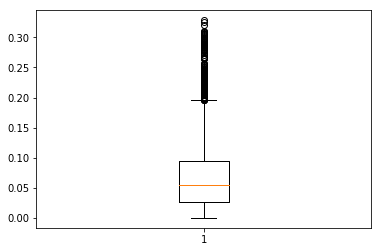

In [45]:
ptl.boxplot(train['Item_Visibility'])

In [46]:
train.loc[train['Item_Visibility']>0.25,'Item_Visibility']=nq.mean(train['Item_Visibility'])

{'boxes': [<matplotlib.lines.Line2D at 0x58edb84240>],
 'caps': [<matplotlib.lines.Line2D at 0x58edb84c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x58edb8a908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x58edb8a4e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x58edb84390>,
  <matplotlib.lines.Line2D at 0x58edb84828>]}

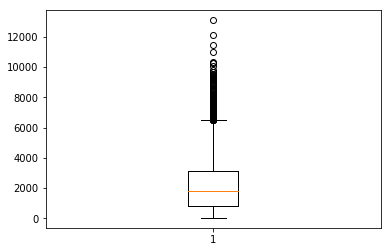

In [47]:
ptl.boxplot(train['Item_Outlet_Sales'])

In [48]:
train.loc[train['Item_Outlet_Sales']>10000,'Item_Outlet_Sales']=nq.mean(train['Item_Outlet_Sales'])

In [49]:
train.columns[train.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [50]:
test.columns[test.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [51]:
train['Outlet_Size']=train['Outlet_Size'].ffill().bfill()
train['Item_Weight'].fillna(nq.mean(train['Item_Weight']),inplace=True)

In [52]:
train.columns[train.isna().any()].tolist()

[]

In [53]:
test['Outlet_Size']=test['Outlet_Size'].ffill().bfill()
test['Item_Weight'].fillna(nq.mean(test['Item_Weight']),inplace=True)

In [54]:
test.columns[test.isna().any()].tolist()

[]

In [55]:
x_train=train.drop(['Item_Fat_Content', 'Item_Outlet_Sales'],axis=1)

In [56]:
y_train=train['Item_Outlet_Sales']

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
reg=DecisionTreeRegressor(min_samples_split=150,min_samples_leaf=20,splitter='random')

In [59]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=150, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random')

In [60]:
reg.score(x_train,y_train)

0.6089431953753944

In [61]:
test=test.drop(['Item_Fat_Content'],axis=1)

In [62]:
pred=reg.predict(test)

In [63]:
results={'ID':test.index,'Item_Outlet_Sales':pred}

In [64]:
output=pf.DataFrame(results)

In [65]:
output.to_csv('res.csv',index=False)